In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import weights
import utils
import scipy.io

In [2]:
# matplotlib config
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

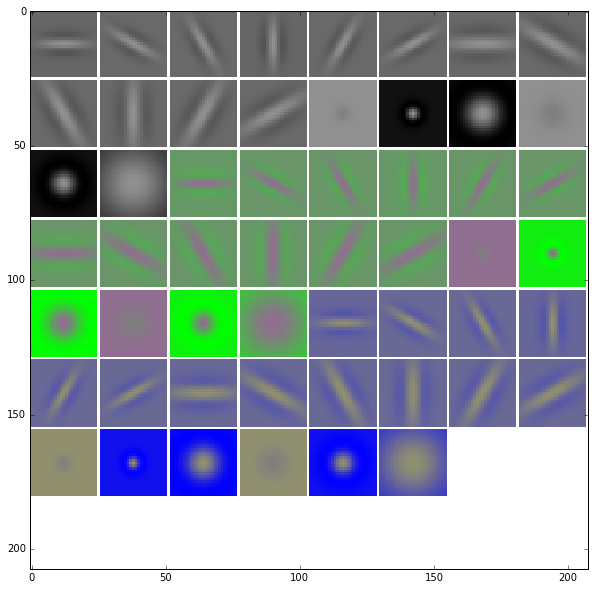

In [3]:
utils.vis_square(weights.make_lm_filters().transpose(0, 2, 3, 1), padval=1)